## Statistical Analysis

In [3]:
# import dependencies
import sqlite3
import pandas as pd
import time
import datetime
from scipy.stats import pearsonr
import numpy as np
from pandas.plotting import scatter_matrix
import dataframe_image as dfi

In [4]:
# connect to sqlite database
conn = sqlite3.connect('/resources/ukraine_analysis.sqlite')

In [5]:
# load data
stats_df = pd.read_sql('select * from migration_sentiments', conn)
stats_df

,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
0,02/24,82955.0,30.0,NaN,NaN,-0.108154
1,02/25,104787.0,25.0,2800.0,0.0,-0.048700
2,02/26,147927.0,185.0,1500.0,0.0,-0.006785
3,02/27,171579.0,0.0,200.0,0.0,-0.026094
4,02/28,163607.0,166.0,800.0,0.0,-0.063197
5,03/01,168167.0,144.0,410.0,200.0,-0.099070
6,03/02,173952.0,202.0,130.0,0.0,-0.100120
7,03/03,166382.0,86.0,3160.0,0.0,-0.078467
8,03/04,171826.0,168.0,166.0,0.0,-0.108797
9,03/05,197818.0,52.0,834.0,16.0,-0.039252


### Preprocess data for statistical analysis

In [6]:
# count null values
stats_df.isna().sum()

data_date              0
ukraine_migration      0
ukraine_casualties    14
russia_casualties      1
russia_prisoners       1
compound_sentiment    13
dtype: int64

In [7]:
# drop null values
stats_df = stats_df.dropna()
stats_df

,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
1,02/25,104787.0,25.0,2800.0,0.0,-0.048700
2,02/26,147927.0,185.0,1500.0,0.0,-0.006785
3,02/27,171579.0,0.0,200.0,0.0,-0.026094
4,02/28,163607.0,166.0,800.0,0.0,-0.063197
5,03/01,168167.0,144.0,410.0,200.0,-0.099070
6,03/02,173952.0,202.0,130.0,0.0,-0.100120
7,03/03,166382.0,86.0,3160.0,0.0,-0.078467
8,03/04,171826.0,168.0,166.0,0.0,-0.108797
9,03/05,197818.0,52.0,834.0,16.0,-0.039252
10,03/06,205708.0,65.0,1000.0,16.0,-0.093408


In [8]:
# add year to date column
stats_df['data_date'] = stats_df['data_date'].astype(str) + '/2022'
stats_df

/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
1,02/25/2022,104787.0,25.0,2800.0,0.0,-0.048700
2,02/26/2022,147927.0,185.0,1500.0,0.0,-0.006785
3,02/27/2022,171579.0,0.0,200.0,0.0,-0.026094
4,02/28/2022,163607.0,166.0,800.0,0.0,-0.063197
5,03/01/2022,168167.0,144.0,410.0,200.0,-0.099070
6,03/02/2022,173952.0,202.0,130.0,0.0,-0.100120
7,03/03/2022,166382.0,86.0,3160.0,0.0,-0.078467
8,03/04/2022,171826.0,168.0,166.0,0.0,-0.108797
9,03/05/2022,197818.0,52.0,834.0,16.0,-0.039252
10,03/06/2022,205708.0,65.0,1000.0,16.0,-0.093408


In [9]:
# convert date column to unix timestamp
stats_df['data_date'] = stats_df['data_date'].apply(lambda x : int(datetime.datetime.strptime(x, '%m/%d/%Y').strftime("%s")))
stats_df

/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
1,1645776000,104787.0,25.0,2800.0,0.0,-0.048700
2,1645862400,147927.0,185.0,1500.0,0.0,-0.006785
3,1645948800,171579.0,0.0,200.0,0.0,-0.026094
4,1646035200,163607.0,166.0,800.0,0.0,-0.063197
5,1646121600,168167.0,144.0,410.0,200.0,-0.099070
6,1646208000,173952.0,202.0,130.0,0.0,-0.100120
7,1646294400,166382.0,86.0,3160.0,0.0,-0.078467
8,1646380800,171826.0,168.0,166.0,0.0,-0.108797
9,1646467200,197818.0,52.0,834.0,16.0,-0.039252
10,1646553600,205708.0,65.0,1000.0,16.0,-0.093408


### Test hypothesis that variables are correlated

In [10]:
# create correlation matrix
matrix = stats_df.corr()
pvalue = stats_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*matrix.shape)
p = pvalue.applymap(lambda x: ''.join(['*' for t in [0.05] if x<=t]))
matrix = matrix.round(2).astype(str) + p

In [11]:
# create mask to make matrix easier to read
mask = np.zeros_like(matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
matrix[mask] = np.nan
(matrix
 .style
 .applymap(lambda x: 'opacity: 0' if pd.isnull(x) else '')
 .set_caption("* p < .05"))

,data_date,ukraine_migration,ukraine_casualties,russia_casualties,russia_prisoners,compound_sentiment
data_date,nan,nan,nan,nan,nan,nan
ukraine_migration,-0.54*,nan,nan,nan,nan,nan
ukraine_casualties,-0.05,0.05,nan,nan,nan,nan
russia_casualties,-0.45*,0.0,-0.11,nan,nan,nan
russia_prisoners,-0.17,0.24,0.11,-0.15,nan,nan
compound_sentiment,-0.13,-0.07,-0.1,0.29,-0.19,nan


In [12]:
# save correlation matrix as image
dfi.export((matrix
 .style
 .applymap(lambda x: 'opacity: 0' if pd.isnull(x) else '')
 .set_caption("* p < .05")),"correlation_matrix.png")

array([[<AxesSubplot:xlabel='data_date', ylabel='data_date'>,
        <AxesSubplot:xlabel='ukraine_migration', ylabel='data_date'>,
        <AxesSubplot:xlabel='ukraine_casualties', ylabel='data_date'>,
        <AxesSubplot:xlabel='russia_casualties', ylabel='data_date'>,
        <AxesSubplot:xlabel='russia_prisoners', ylabel='data_date'>,
        <AxesSubplot:xlabel='compound_sentiment', ylabel='data_date'>],
       [<AxesSubplot:xlabel='data_date', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='ukraine_migration', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='ukraine_casualties', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='russia_casualties', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='russia_prisoners', ylabel='ukraine_migration'>,
        <AxesSubplot:xlabel='compound_sentiment', ylabel='ukraine_migration'>],
       [<AxesSubplot:xlabel='data_date', ylabel='ukraine_casualties'>,
        <AxesSubplot:xlabel='ukraine_migration', ylab

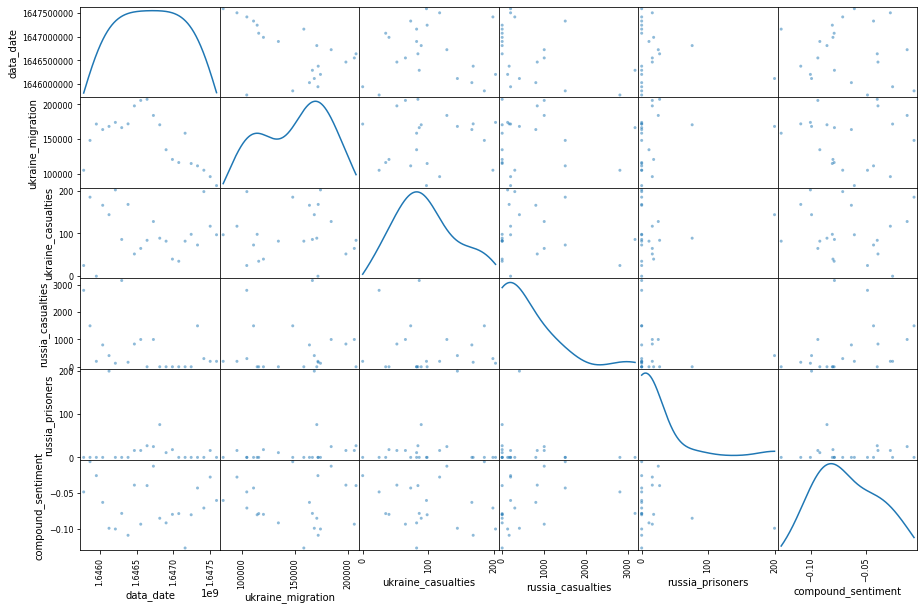

In [13]:
# use scatterplots to check if relationship is nonlinear
scatter_matrix(stats_df, alpha=0.5, figsize=(15, 10), diagonal='kde')

In [14]:
#close out the connection
conn.close()